# Sectoral Overview

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import re
import openpyxl

import warnings

# Suppress from Seaborn
warnings.filterwarnings("ignore", category=FutureWarning)

from matplotlib.ticker import PercentFormatter
plt.rcParams.update({ "figure.figsize" : (8, 5),"axes.facecolor" : "white", "axes.edgecolor":  "black"})
plt.rcParams["figure.facecolor"]= "w"
pd.plotting.register_matplotlib_converters()
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:
df_1 = pd.read_excel('data/full_data_sectors.xlsx', decimal='.')
df_1.tail(5)

,industries,RRI_indsutry,Year,Compensation of employees,Depreciation,Gross Output,Gross output in,Gross output out,Intermediate Consumption,No of Establishments,No. of employees,Taxes on production,Total_fixed_capital_formation
3537,66. Activities auxiliary to insurance and pens...,Insurance,2017,10442,843,20980,-,-,5533,107,NaN,93,341
3538,66. Activities auxiliary to insurance and pens...,Insurance,2018,11113,937,24274,-,-,6293,81,NaN,74,815
3539,66. Activities auxiliary to insurance and pens...,Insurance,2019,10950,869,24556,-,-,5199,81,NaN,78,1410
3540,66. Activities auxiliary to insurance and pens...,Insurance,2020,9455,926,19240,-,-,4010,54,NaN,77,1006
3541,66. Activities auxiliary to insurance and pens...,Insurance,2021,9976,1008,21205,-,-,4689,54,NaN,296,1507


In [3]:
# Clean column 'industries' entries
def process_industry(industry):
    industry = re.sub(r'\(Non-Profit\)', '', industry)
    industry = re.sub(r'\(Profit\)', '', industry) 
    industry = industry.lstrip('-').replace(',', '')
    industry = re.sub(r'(\d+)\.', r'\1_', industry)
    industry = industry.lower().replace(' ', '_')
    industry = industry.lstrip('_')
    industry = re.sub(r'_{2,}', '_', industry)
    return industry

In [4]:

df_1['industries'] = df_1['industries'].apply(process_industry)


In [5]:
df_1[['code', 'industry']] = df_1['industries'].str.extract(r'^(\d+)_(.*)$')
df_1.columns = df_1.columns.str.lower().str.replace(' ', '_').str.replace('.', '')
df_1.head()

,industries,rri_indsutry,year,compensation_of_employees,depreciation,gross_output,gross_output_in,gross_output_out,intermediate_consumption,no_of_establishments,no_of_employees,taxes_on_production,total_fixed_capital_formation,code,industry
0,87_residential_care_activities,NaN,2011,1921,212,3144,-,-,997,-,NaN,15,99,87,residential_care_activities
1,87_residential_care_activities,NaN,2012,1850,149,3157,-,-,1148,-,NaN,11,62,87,residential_care_activities
2,87_residential_care_activities,NaN,2013,2499,108,4366,-,-,1747,-,NaN,11,9,87,residential_care_activities
3,87_residential_care_activities,NaN,2014,3437,287,5866,-,-,2129,-,NaN,13,94,87,residential_care_activities
4,87_residential_care_activities,NaN,2015,3608,540,6098,-,-,1832,-,NaN,118,280,87,residential_care_activities


In [6]:
nan_count = df_1['code'].isna().sum()
print("Number of rows with NaN in 'code': ", nan_count)

Number of rows with NaN in 'code':  11


In [7]:
df_1 = df_1.dropna(subset=['code'])
df_1.reset_index(drop=True, inplace=True)

In [8]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3531 entries, 0 to 3530
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   industries                     3531 non-null   object 
 1   rri_indsutry                   3410 non-null   object 
 2   year                           3531 non-null   int64  
 3   compensation_of_employees      3531 non-null   int64  
 4   depreciation                   3531 non-null   int64  
 5   gross_output                   3531 non-null   int64  
 6   gross_output_in                3389 non-null   object 
 7   gross_output_out               3389 non-null   object 
 8   intermediate_consumption       3531 non-null   int64  
 9   no_of_establishments           3531 non-null   object 
 10  no_of_employees                245 non-null    float64
 11  taxes_on_production            3531 non-null   int64  
 12  total_fixed_capital_formation  3531 non-null   i

In [9]:
df_1.columns

Index(['industries', 'rri_indsutry', 'year', 'compensation_of_employees',
       'depreciation', 'gross_output', 'gross_output_in', 'gross_output_out',
       'intermediate_consumption', 'no_of_establishments', 'no_of_employees',
       'taxes_on_production', 'total_fixed_capital_formation', 'code',
       'industry'],
      dtype='object')

In [10]:
# List of columns to convert to float
columns_to_convert = [
    'compensation_of_employees', 'depreciation', 'gross_output_in', 'gross_output_out', 'no_of_establishments', 'intermediate_consumption',
    'no_of_employees', 'taxes_on_production', 'total_fixed_capital_formation', 'gross_output'
]

df_1[columns_to_convert] = df_1[columns_to_convert].replace('-', np.nan)

df_1[columns_to_convert] = df_1[columns_to_convert].astype(float)



In [11]:
# select only two digit codes
# Aggregate industry data 2-digit level
two_digit_df = df_1[df_1['code'].str.len() == 2]
two_digit_df = two_digit_df.reset_index(drop=True)
two_digit_df.head()

,industries,rri_indsutry,year,compensation_of_employees,depreciation,gross_output,gross_output_in,gross_output_out,intermediate_consumption,no_of_establishments,no_of_employees,taxes_on_production,total_fixed_capital_formation,code,industry
0,87_residential_care_activities,NaN,2011,1921.000,212.000,3144.000,NaN,NaN,997.000,NaN,NaN,15.000,99.000,87,residential_care_activities
1,87_residential_care_activities,NaN,2012,1850.000,149.000,3157.000,NaN,NaN,1148.000,NaN,NaN,11.000,62.000,87,residential_care_activities
2,87_residential_care_activities,NaN,2013,2499.000,108.000,4366.000,NaN,NaN,1747.000,NaN,NaN,11.000,9.000,87,residential_care_activities
3,87_residential_care_activities,NaN,2014,3437.000,287.000,5866.000,NaN,NaN,2129.000,NaN,NaN,13.000,94.000,87,residential_care_activities
4,87_residential_care_activities,NaN,2015,3608.000,540.000,6098.000,NaN,NaN,1832.000,NaN,NaN,118.000,280.000,87,residential_care_activities


## Gross Output

/var/folders/qz/5gqy7l_x781bw95tpvxd2x2c0000gp/T/ipykernel_11328/1606307617.py:10: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


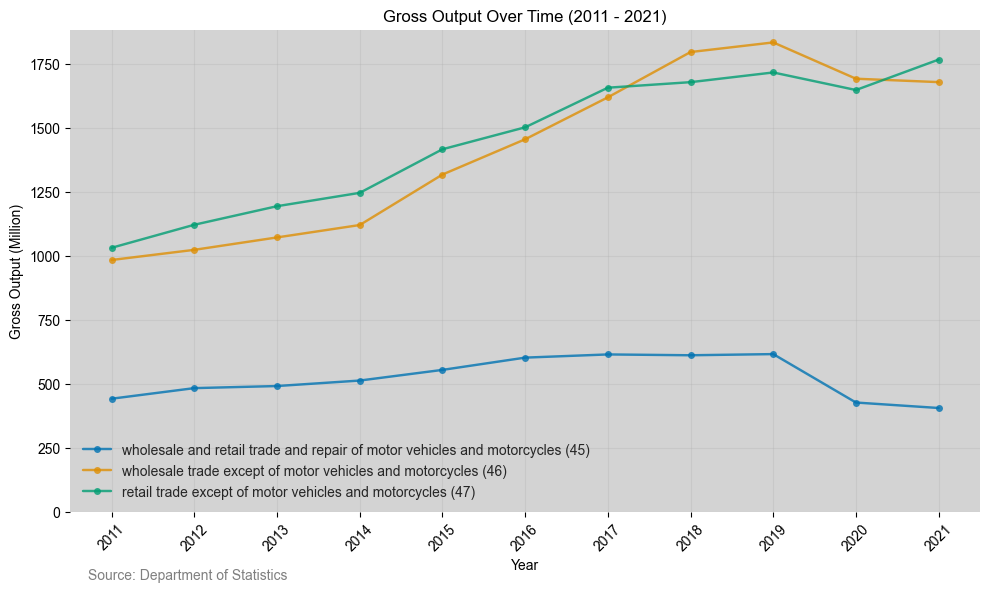

In [12]:
# Filter the two_digit_df DataFrame for selected codes
selected_codes = ['45', '46', '47']
filtered_df = two_digit_df[two_digit_df['code'].isin(selected_codes)]
sns.set_palette("colorblind") 

fig, ax = plt.subplots(figsize=(10, 6))


plt.gca().set_facecolor('lightgray')
plt.style.use('seaborn')


for code in selected_codes:
    code_data = filtered_df[(filtered_df['year'] >= 2011) &
                            (filtered_df['year'] <= 2021) &
                            (filtered_df['code'] == code)]
    
    industry_label = code_data['industry'].iloc[0].replace('_', ' ')
    
    ax.plot(code_data['year'], code_data['gross_output'] / 1000, label=f'{industry_label} ({code})', marker='o', markersize=5, linestyle='-', alpha=0.8)


ax.set_xlabel('Year')
ax.set_ylabel('Gross Output (Million)')
ax.set_title('Gross Output Over Time (2011 - 2021)')
ax.legend()

years = filtered_df['year'].unique()
ax.set_xticks(years)
plt.xticks(rotation=45)

source_text = 'Source: Department of Statistics' 
plt.text(0.02, -0.14, source_text, transform=ax.transAxes, fontsize=10, color='gray')

for spine in ax.spines.values():
    spine.set_visible(False)
ax.grid(alpha=0.3)

max_gross_output = max(filtered_df['gross_output']) / 1000
ax.set_ylim(0, max_gross_output + 50)


plt.tight_layout()
plt.show()

## Value Added

In [13]:
two_digit_df['value_added'] = two_digit_df['gross_output'] - two_digit_df['intermediate_consumption']

/var/folders/qz/5gqy7l_x781bw95tpvxd2x2c0000gp/T/ipykernel_11328/3186711008.py:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


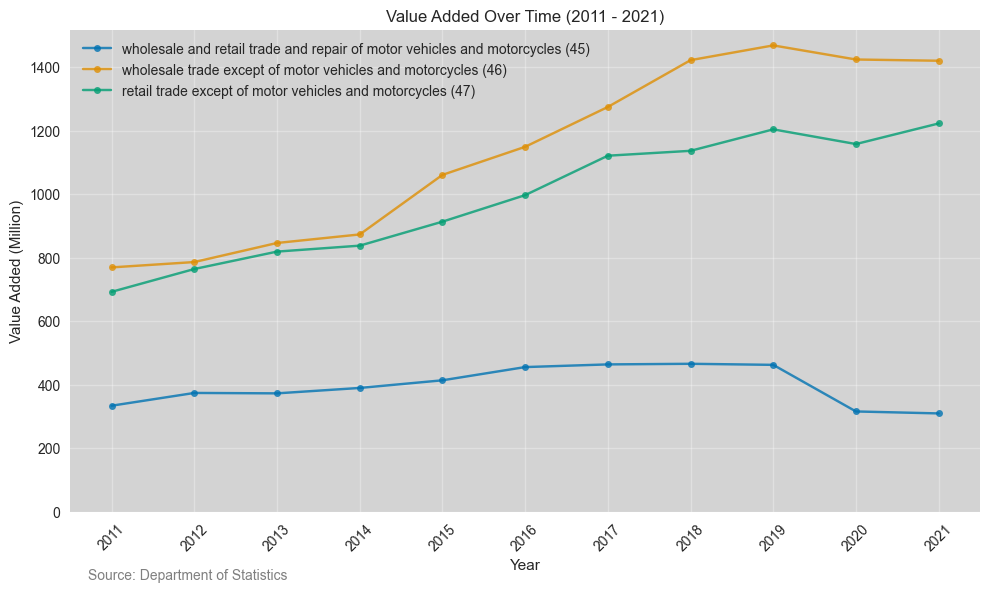

In [14]:
# Filter the two_digit_df DataFrame for selected codes
selected_codes = ['45', '46', '47']
filtered_df = two_digit_df[two_digit_df['code'].isin(selected_codes)]
sns.set_palette("colorblind") 

fig, ax = plt.subplots(figsize=(10, 6))

plt.gca().set_facecolor('lightgray')
plt.style.use('seaborn')


for code in selected_codes:
    code_data = filtered_df[(filtered_df['year'] >= 2011) &
                            (filtered_df['year'] <= 2021) &
                            (filtered_df['code'] == code)]
    
    industry_label = code_data['industry'].iloc[0].replace('_', ' ')
    
    ax.plot(code_data['year'], code_data['value_added'] / 1000, label=f'{industry_label} ({code})', marker='o', markersize=5, linestyle='-', alpha=0.8)


ax.set_xlabel('Year')
ax.set_ylabel('Value Added (Million)')
ax.set_title('Value Added Over Time (2011 - 2021)')
ax.legend()

years = filtered_df['year'].unique()
ax.set_xticks(years)
plt.xticks(rotation=45)

source_text = 'Source: Department of Statistics' 
plt.text(0.02, -0.14, source_text, transform=ax.transAxes, fontsize=10, color='gray')

for spine in ax.spines.values():
    spine.set_visible(False)
ax.grid(alpha=0.3)

max_value_added = max(filtered_df['value_added']) / 1000
ax.set_ylim(0, max_value_added + 50)


plt.tight_layout()
plt.show()


In [15]:
two_digit_df['code'] = two_digit_df['code'].astype(int)

# sector identification
conditions = [
    (two_digit_df['code'] < 10),
    (two_digit_df['code'] >= 10) & (two_digit_df['code'] <= 33),
    (two_digit_df['code'] >= 35) & (two_digit_df['code'] <= 39),
    (two_digit_df['code'] >= 41) & (two_digit_df['code'] <= 43),
    (two_digit_df['code'] >= 45) & (two_digit_df['code'] <= 47),
    (two_digit_df['code'] >= 49) & (two_digit_df['code'] <= 53)
]

choices = [
    'mining_and_quarrying',
    'manufacturing',
    'electricity_and_water_supply',
    'construction',
    'distribution',
    'transportation'
]

# Create a new 'industry' column based on the conditions and choices
two_digit_df['sector'] = np.select(conditions, choices, default='other')


In [16]:
two_digit_df.columns

Index(['industries', 'rri_indsutry', 'year', 'compensation_of_employees',
       'depreciation', 'gross_output', 'gross_output_in', 'gross_output_out',
       'intermediate_consumption', 'no_of_establishments', 'no_of_employees',
       'taxes_on_production', 'total_fixed_capital_formation', 'code',
       'industry', 'value_added', 'sector'],
      dtype='object')

/var/folders/qz/5gqy7l_x781bw95tpvxd2x2c0000gp/T/ipykernel_11328/423652479.py:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


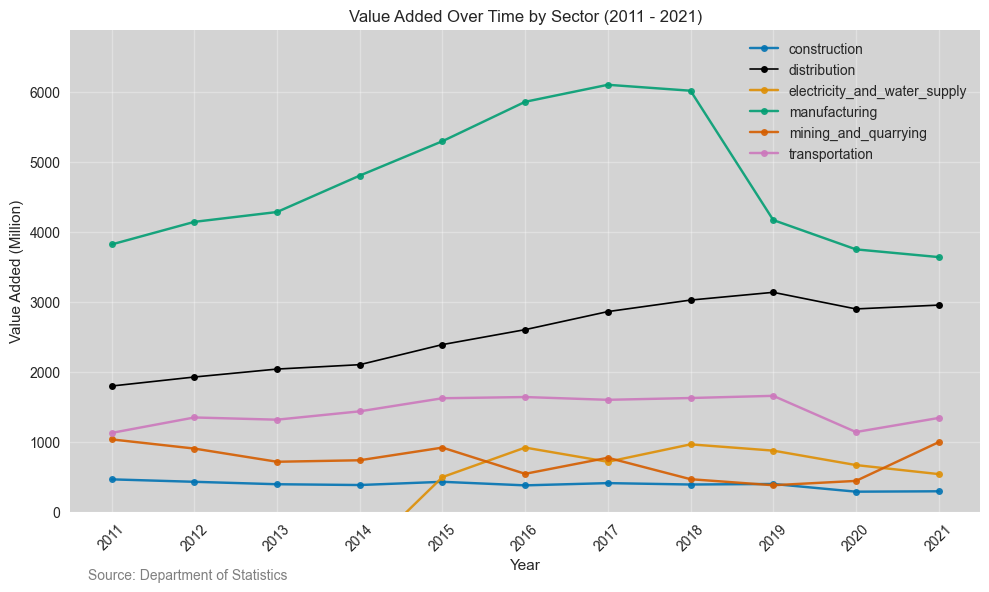

In [17]:
# Group the two_digit_df DataFrame by 'year' and 'sector' and calculate the value_added for each group
grouped_df = two_digit_df.groupby(['year', 'sector'])['value_added'].sum().reset_index()
sns.set_palette("colorblind")

fig, ax = plt.subplots(figsize=(10, 6))


plt.gca().set_facecolor('lightgray')
plt.style.use('seaborn')


sector_line_properties = {
    'mining_and_quarrying': {'alpha': 0.9},
    'manufacturing': {'alpha': 0.9},
    'electricity_and_water_supply': {'alpha': 0.9},
    'construction': {'alpha': 0.9},
    'distribution': {'color': 'black','linewidth': 1.2, 'alpha': 1.0},  # Make 'distribution' line thicker
    'transportation': {'alpha': 0.9}
}


exclude_sectors = ['other']

for sector in grouped_df['sector'].unique():
    if sector not in exclude_sectors:
        sector_data = grouped_df[grouped_df['sector'] == sector]
        properties = sector_line_properties.get(sector, {}) 
    
        ax.plot(sector_data['year'], sector_data['value_added'] / 1000, label=f'{sector}', marker='o', markersize=5, linestyle='-', **properties)


ax.set_xlabel('Year')
ax.set_ylabel('Value Added (Million)')
ax.set_title('Value Added Over Time by Sector (2011 - 2021)')
ax.legend()

years = grouped_df['year'].unique()
ax.set_xticks(years)
plt.xticks(rotation=45)


source_text = 'Source: Department of Statistics' 
plt.text(0.02, -0.14, source_text, transform=ax.transAxes, fontsize=10, color='gray')


for spine in ax.spines.values():
    spine.set_visible(False)
ax.grid(alpha=0.3)

max_value_added = max(grouped_df['value_added']) / 1000
ax.set_ylim(0, max_value_added + 50)


plt.tight_layout()
plt.show()


/var/folders/qz/5gqy7l_x781bw95tpvxd2x2c0000gp/T/ipykernel_11328/2716290368.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


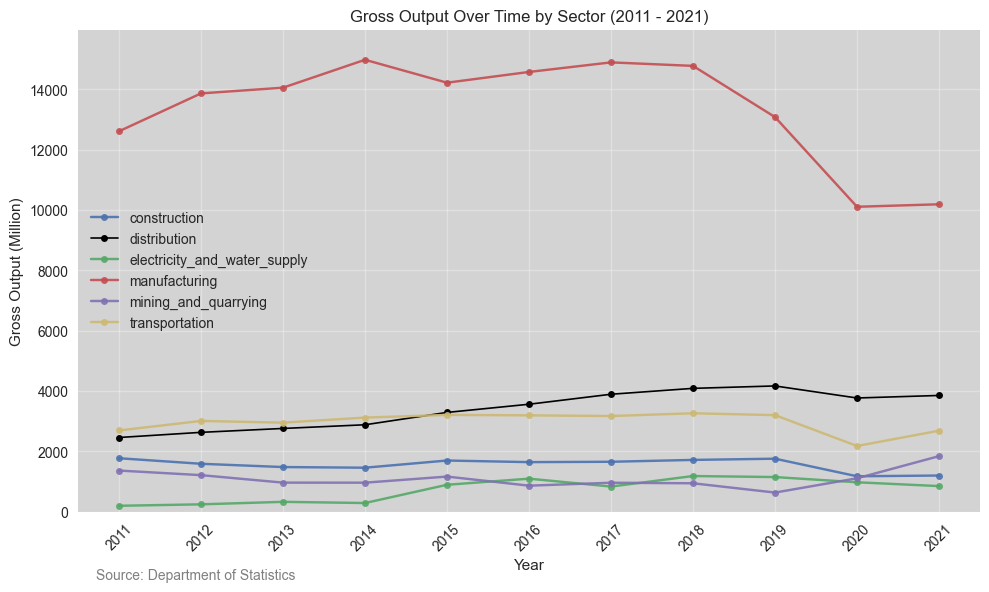

In [18]:
# Gross output by sector
fig, ax = plt.subplots(figsize=(10, 6))

plt.gca().set_facecolor('lightgray')
plt.style.use('seaborn')

sector_line_properties = {
    'mining_and_quarrying': {'alpha': 0.9},
    'manufacturing': {'alpha': 0.9},
    'electricity_and_water_supply': {'alpha': 0.9},
    'construction': {'alpha': 0.9},
    'distribution': {'color': 'black','linewidth': 1.2, 'alpha': 1.0},  
    'transportation': {'alpha': 0.9}
}

exclude_sectors = ['other']


grouped_df = two_digit_df.groupby(['year', 'sector'])['gross_output'].sum().reset_index()


for sector in grouped_df['sector'].unique():
    if sector not in exclude_sectors:
        sector_data = grouped_df[grouped_df['sector'] == sector]
        properties = sector_line_properties.get(sector, {})  
    
        ax.plot(sector_data['year'], sector_data['gross_output'] / 1000, label=f'{sector}', marker='o', markersize=5, linestyle='-', **properties)


ax.set_xlabel('Year')
ax.set_ylabel('Gross Output (Million)')
ax.set_title('Gross Output Over Time by Sector (2011 - 2021)')
ax.legend()

years = grouped_df['year'].unique()
ax.set_xticks(years)
plt.xticks(rotation=45)


source_text = 'Source: Department of Statistics' 
plt.text(0.02, -0.14, source_text, transform=ax.transAxes, fontsize=10, color='gray')


for spine in ax.spines.values():
    spine.set_visible(False)
ax.grid(alpha=0.3)

max_gross_output = max(grouped_df['gross_output']) / 1000
ax.set_ylim(0, max_gross_output + 1000)


plt.tight_layout()
plt.show()


/var/folders/qz/5gqy7l_x781bw95tpvxd2x2c0000gp/T/ipykernel_11328/4081807451.py:13: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


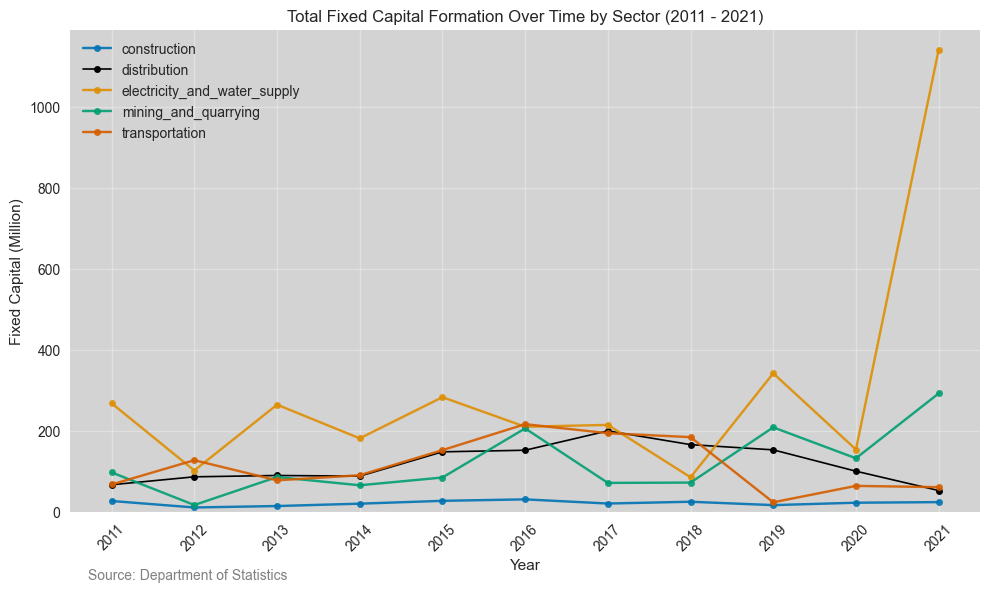

In [19]:
# total_fixed_capital_formation by sector
grouped_df = two_digit_df.groupby(['year', 'sector'])['total_fixed_capital_formation'].sum().reset_index()


excluded_sectors = ['other', 'manufacturing']
grouped_df = grouped_df[~grouped_df['sector'].isin(excluded_sectors)]

sns.set_palette("colorblind")

fig, ax = plt.subplots(figsize=(10, 6))

plt.gca().set_facecolor('lightgray')
plt.style.use('seaborn')

sector_line_properties = {
    'mining_and_quarrying': {'alpha': 0.9},
    'electricity_and_water_supply': {'alpha': 0.9},
    'construction': {'alpha': 0.9},
    'distribution': {'color': 'black','linewidth': 1.2, 'alpha': 1.0},  
    'transportation': {'alpha': 0.9}
}

for sector in grouped_df['sector'].unique():
    sector_data = grouped_df[grouped_df['sector'] == sector]
    properties = sector_line_properties.get(sector, {})  
    
    ax.plot(sector_data['year'], sector_data['total_fixed_capital_formation'] / 1000, label=f'{sector}', marker='o', markersize=5, linestyle='-', **properties)


ax.set_xlabel('Year')
ax.set_ylabel('Fixed Capital (Million)')
ax.set_title('Total Fixed Capital Formation Over Time by Sector (2011 - 2021)')
ax.legend()

years = grouped_df['year'].unique()
ax.set_xticks(years)
plt.xticks(rotation=45)


source_text = 'Source: Department of Statistics' 
plt.text(0.02, -0.14, source_text, transform=ax.transAxes, fontsize=10, color='gray')


for spine in ax.spines.values():
    spine.set_visible(False)
ax.grid(alpha=0.3)

max_total_fixed_capital_formation = max(grouped_df['total_fixed_capital_formation']) / 1000
ax.set_ylim(0, max_total_fixed_capital_formation + 50)


plt.tight_layout()
plt.show()


In [20]:
two_digit_df['wage'] = two_digit_df['compensation_of_employees'] / two_digit_df['no_of_employees']


In [21]:
# Calculate the average wage based on non-NaN entries
average_wage = two_digit_df['wage'].mean(skipna=True)

# Fill NaN values in the 'wage' column with the calculated average wage
two_digit_df['wage'].fillna(average_wage, inplace=True)

In [22]:
two_digit_df['est_num_worker'] = two_digit_df['compensation_of_employees'] / two_digit_df['wage']
two_digit_df['productivity'] = two_digit_df['gross_output'] / two_digit_df['est_num_worker']
two_digit_df['net_productivity'] = two_digit_df['value_added'] / two_digit_df['est_num_worker']

/var/folders/qz/5gqy7l_x781bw95tpvxd2x2c0000gp/T/ipykernel_11328/85462381.py:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


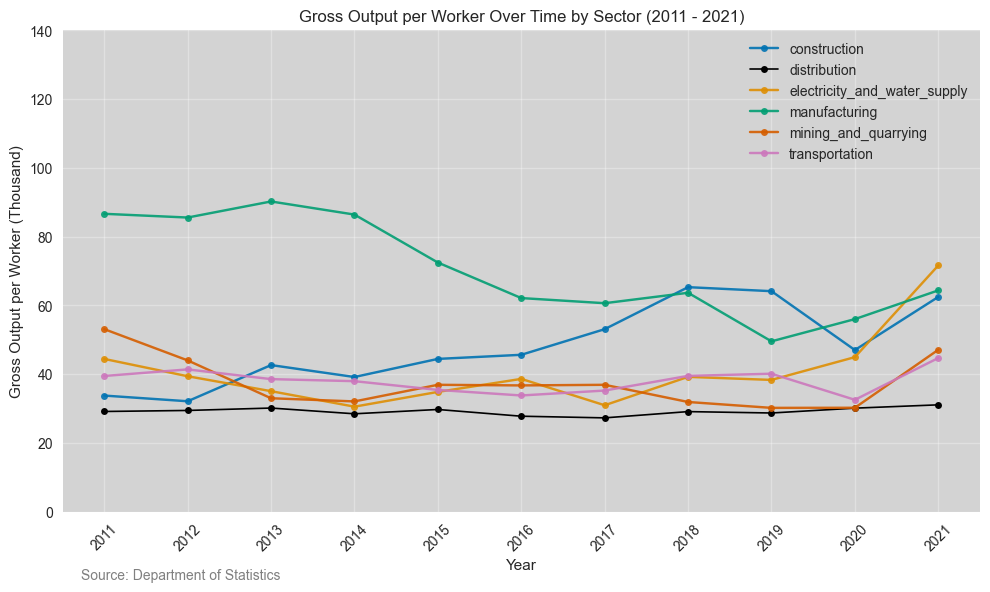

In [23]:
# Group data by 'year' and 'sector' and calculate the mean productivity for each group
grouped_df = two_digit_df.groupby(['year', 'sector'])['productivity'].mean().reset_index()
sns.set_palette("colorblind")

fig, ax = plt.subplots(figsize=(10, 6))


plt.gca().set_facecolor('lightgray')
plt.style.use('seaborn')


sector_line_properties = {
    'other': {'alpha': 0.9},
    'mining_and_quarrying': {'alpha': 0.9},
    'manufacturing': {'alpha': 0.9},
    'electricity_and_water_supply': {'alpha': 0.9},
    'construction': {'alpha': 0.9},
    'distribution': {'color': 'black', 'linewidth': 1.2, 'alpha': 1.0},  
    'transportation': {'alpha': 0.9}
}


exclude_sectors = ['other']


for sector in grouped_df['sector'].unique():
    if sector not in exclude_sectors:
        sector_data = grouped_df[grouped_df['sector'] == sector]
        properties = sector_line_properties.get(sector, {})  
    
        ax.plot(sector_data['year'], sector_data['productivity'], label=f'{sector}', marker='o', markersize=5, linestyle='-', **properties)


ax.set_xlabel('Year')
ax.set_ylabel('Gross Output per Worker (Thousand)')
ax.set_title('Gross Output per Worker Over Time by Sector (2011 - 2021)')
ax.legend()

years = grouped_df['year'].unique()
ax.set_xticks(years)
plt.xticks(rotation=45)


source_text = 'Source: Department of Statistics' 
plt.text(0.02, -0.14, source_text, transform=ax.transAxes, fontsize=10, color='gray')


for spine in ax.spines.values():
    spine.set_visible(False)
ax.grid(alpha=0.3)

max_productivity = max(grouped_df['productivity'])
ax.set_ylim(0, max_productivity + 50)


plt.tight_layout()
plt.show()


/var/folders/qz/5gqy7l_x781bw95tpvxd2x2c0000gp/T/ipykernel_11328/3224619332.py:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


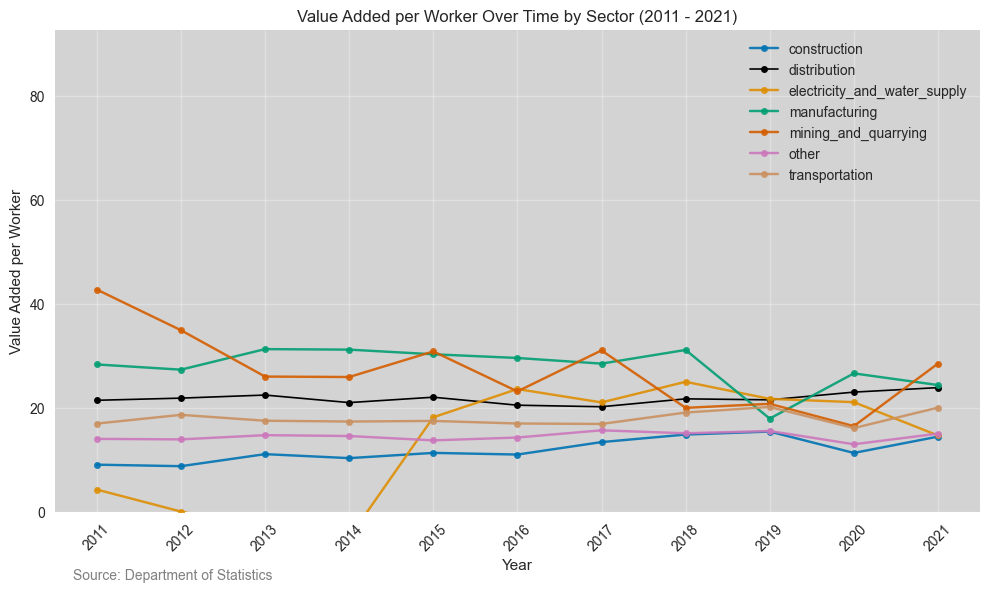

In [24]:
# Group data by 'year' and 'sector' and calculate the mean net_productivity for each group
grouped_df = two_digit_df.groupby(['year', 'sector'])['net_productivity'].mean().reset_index()
sns.set_palette("colorblind")

fig, ax = plt.subplots(figsize=(10, 6))

plt.gca().set_facecolor('lightgray')
plt.style.use('seaborn')

sector_line_properties = {
    'other': {'alpha': 0.9},
    'mining_and_quarrying': {'alpha': 0.9},
    'manufacturing': {'alpha': 0.9},
    'electricity_and_water_supply': {'alpha': 0.9},
    'construction': {'alpha': 0.9},
    'distribution': {'color': 'black', 'linewidth': 1.2, 'alpha': 1.0},  
    'transportation': {'alpha': 0.9}
}

for sector in grouped_df['sector'].unique():
    sector_data = grouped_df[grouped_df['sector'] == sector]
    properties = sector_line_properties.get(sector, {})  
    
    ax.plot(sector_data['year'], sector_data['net_productivity'], label=f'{sector}', marker='o', markersize=5, linestyle='-', **properties)

ax.set_xlabel('Year')
ax.set_ylabel('Value Added per Worker')
ax.set_title('Value Added per Worker Over Time by Sector (2011 - 2021)')
ax.legend()

years = grouped_df['year'].unique()
ax.set_xticks(years)
plt.xticks(rotation=45)


source_text = 'Source: Department of Statistics' 
plt.text(0.02, -0.14, source_text, transform=ax.transAxes, fontsize=10, color='gray')

for spine in ax.spines.values():
    spine.set_visible(False)
ax.grid(alpha=0.3)

max_net_productivity = max(grouped_df['net_productivity'])
ax.set_ylim(0, max_net_productivity + 50)

plt.tight_layout()
plt.show()


# Geography

In [25]:
# Load Data

df_2 = pd.read_excel('data/retail_wholesale_geography.xlsx', decimal='.')
df_2.head()

,sector,region,ec_variable,year,value
0,45_Wholesale_and_retail_trade_and_repair_of_mo...,Middle,Gross_output,2011,387593
1,45_Wholesale_and_retail_trade_and_repair_of_mo...,Middle,Intermediate_Consumption,2011,93372
2,45_Wholesale_and_retail_trade_and_repair_of_mo...,Middle,Gross_value_added,2011,294221
3,45_Wholesale_and_retail_trade_and_repair_of_mo...,Middle,Compensation_of_employees,2011,71236
4,45_Wholesale_and_retail_trade_and_repair_of_mo...,Middle,Taxes_on_production,2011,109595


In [26]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693 entries, 0 to 692
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   sector       693 non-null    object
 1   region       693 non-null    object
 2   ec_variable  693 non-null    object
 3   year         693 non-null    int64 
 4   value        693 non-null    int64 
dtypes: int64(2), object(3)
memory usage: 27.2+ KB


In [27]:
df_2['industry'] = df_2['sector'].str[:2]

In [28]:
df_2.columns

Index(['sector', 'region', 'ec_variable', 'year', 'value', 'industry'], dtype='object')

In [29]:
df_2['region'].unique()

array(['Middle', 'North', 'South'], dtype=object)

In [30]:
print(df_2['industry'].unique())

['45' '46' '47']


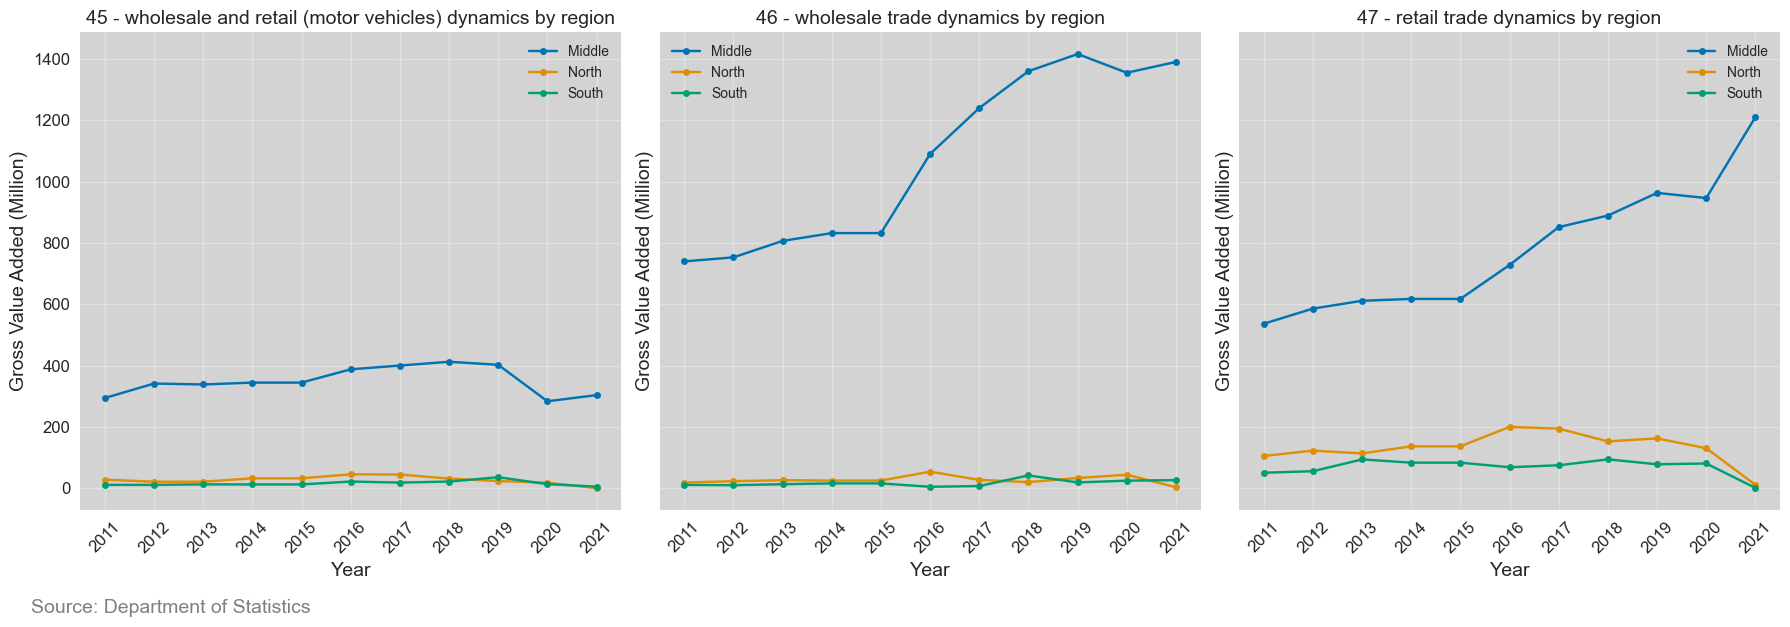

In [31]:
# Geography graph
industries = ['45', '46', '47']
industry_descriptions = {
    '45': 'wholesale and retail (motor vehicles)',
    '46': 'wholesale trade',
    '47': 'retail trade'
}
regions = ['Middle', 'North', 'South']


sns.set_palette("colorblind")


fig, axs = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

for ax in axs:
    ax.set_facecolor('lightgray')
    ax.grid(alpha=0.3)

source_text = 'Source: Department of Statistics'

for i, industry in enumerate(industries):
    ax = axs[i]

    
    industry_df = df_2[(df_2['industry'] == industry) & (df_2['ec_variable'] == 'Gross_value_added')]

    for region in regions:
        region_df = industry_df[industry_df['region'] == region]

        grouped_df = region_df.groupby(['year'])['value'].max().reset_index()

       
        grouped_df['value'] /= 1000

    
        ax.plot(grouped_df['year'], grouped_df['value'], label=f'{region}', marker='o', markersize=5, linestyle='-')

    ax.set_xlabel('Year', fontsize=14)
    ax.set_ylabel('Gross Value Added (Million)', fontsize=14)
    ax.set_title(f'{industry} - {industry_descriptions[industry]} dynamics by region',fontsize=14)
    ax.legend()

    years = grouped_df['year'].unique()
    ax.set_xticks(years)
    ax.set_xticklabels(years, rotation=45)
    ax.tick_params(axis='both', which='both', labelsize=12)

fig.text(0.02, -0.03, source_text, fontsize=14, color='gray')


plt.tight_layout()
plt.show()
